In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import datetime
import seaborn as sns

In [2]:
def patch_diff(patch1, patch2):
    """Computing the sum of squared differences (SSD) between two images."""
    if patch1.shape != patch2.shape:
        print("Images don't have the same shape.")
        return
    return np.sum((np.array(patch1, dtype=np.float32) - np.array(patch2, dtype=np.float32))**2)

In [3]:
def plot_density_plots(results_noisy_descr_patches_diffs, results_noisy_descr_patches_x_coords, results_noisy_descr_patches_y_coords, results_noisy_descr_patches_positions):

    for nr_similar_patches in [5,10,20,50,100]:
        ssds = []

        for q_it in range(total_nr_query_patches):
            for c_it in range(nr_similar_patches):

                # getting the query patch from the clean image
                x_query = query_x_coords[q_it]
                y_query = query_y_coords[q_it]
                query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

                # getting the compare patch from the clean image
                x_compare = results_noisy_descr_patches_x_coords[q_it][c_it]
                y_compare = results_noisy_descr_patches_y_coords[q_it][c_it]
                compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

                # calculating the difference in the clean image
                actual_diff = patch_diff(query_patch, compare_patch)
                ssds.append(actual_diff)

        ssds = np.array(ssds)

        sns.distplot(ssds, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
        
#         plt.figure(figsize=(10, 5))
#         plt.hist(ssds, bins=bins, density=1)
#         plt.xlim(0, 3000000)
#         plt.ylim(0, 0.00001)
        plt.show()

In [4]:
# zizakic finetuned
pickle_dir = 'zimnica'
pickle_file_path = pickle_dir + '/histograms_zizakic_finetuned_panel13_qstride300_cstride8_20191126_102008.pickle'
try:
    total_nr_query_patches_f, results_noisy_descr_patches_diffs_f, results_noisy_descr_patches_x_coords_f, results_noisy_descr_patches_y_coords_f, results_noisy_descr_patches_positions_f, query_x_coords_f, query_y_coords_f, image_f, patch_size_f = pickle.load(open(pickle_file_path, "rb"))
except Exception as e:
    print("Problem while trying to unpickle: ", str(e))

In [5]:
# zizakic
pickle_dir = 'zimnica'
pickle_file_path = pickle_dir + '/histograms_zizakic_panel13_qstride300_cstride8_20191126_120454.pickle'
try:
    total_nr_query_patches_z, results_noisy_descr_patches_diffs_z, results_noisy_descr_patches_x_coords_z, results_noisy_descr_patches_y_coords_z, results_noisy_descr_patches_positions_z, query_x_coords_z, query_y_coords_z, image_z, patch_size_z = pickle.load(open(pickle_file_path, "rb"))
except Exception as e:
    print("Problem while trying to unpickle: ", str(e))

In [6]:
# chen
pickle_dir = 'zimnica'
pickle_file_path = pickle_dir + '/histograms_chen_panel13_qstride300_cstride8_20191126_102119.pickle'
try:
    total_nr_query_patches_c, results_noisy_descr_patches_diffs_c, results_noisy_descr_patches_x_coords_c, results_noisy_descr_patches_y_coords_c, results_noisy_descr_patches_positions_c, query_x_coords_c, query_y_coords_c, image_c, patch_size_c = pickle.load(open(pickle_file_path, "rb"))
except Exception as e:
    print("Problem while trying to unpickle: ", str(e))

In [7]:
assert total_nr_query_patches_c == total_nr_query_patches_z
assert query_x_coords_c == query_x_coords_z
assert query_y_coords_c == query_y_coords_z
assert image_c.all() == image_z.all()
assert patch_size_c == patch_size_z

assert total_nr_query_patches_c == total_nr_query_patches_f
assert query_x_coords_c == query_x_coords_f
assert query_y_coords_c == query_y_coords_f
assert image_c.all() == image_f.all()
assert patch_size_c == patch_size_f


total_nr_query_patches = total_nr_query_patches_c
query_x_coords = query_x_coords_c
query_y_coords = query_y_coords_c
image = image_c
patch_size = patch_size_c

In [8]:
bins = np.linspace(0, 3000000, 100)

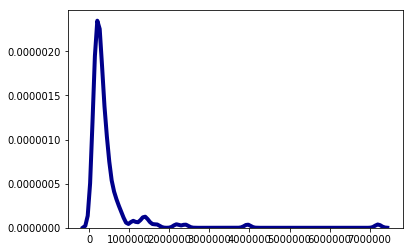

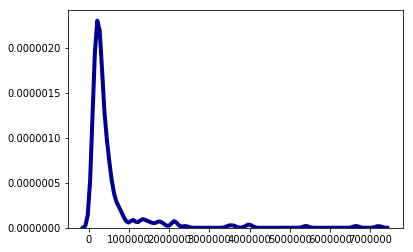

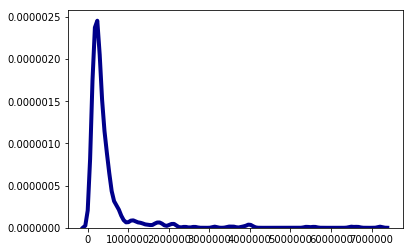

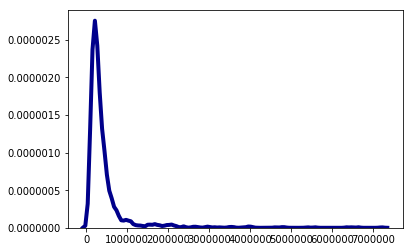

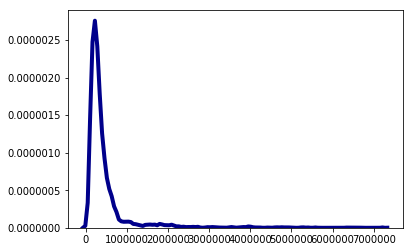

In [9]:
plot_density_plots(results_noisy_descr_patches_diffs_c, results_noisy_descr_patches_x_coords_c, results_noisy_descr_patches_y_coords_c, results_noisy_descr_patches_positions_c)

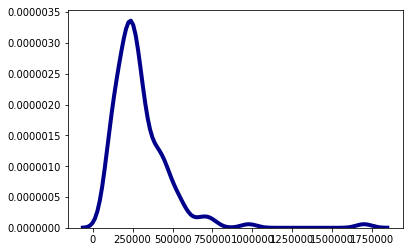

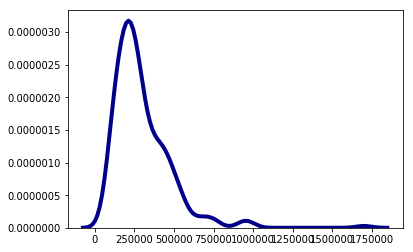

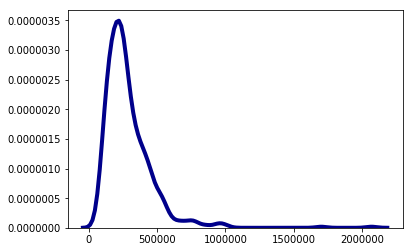

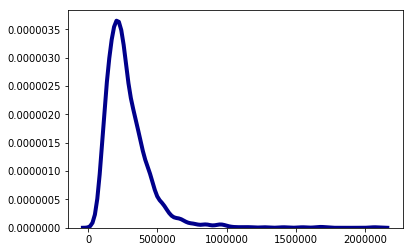

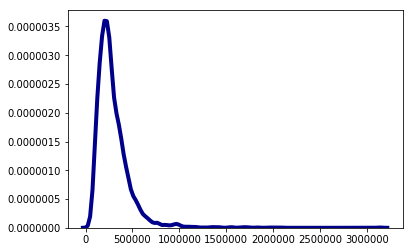

In [10]:
plot_density_plots(results_noisy_descr_patches_diffs_z, results_noisy_descr_patches_x_coords_z, results_noisy_descr_patches_y_coords_z, results_noisy_descr_patches_positions_z)

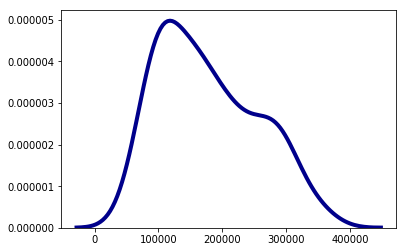

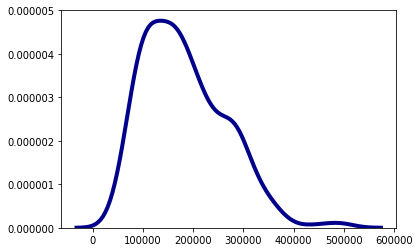

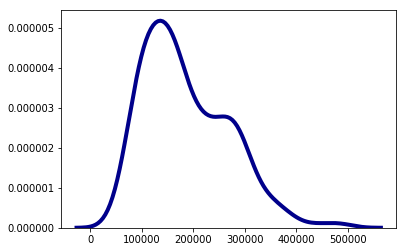

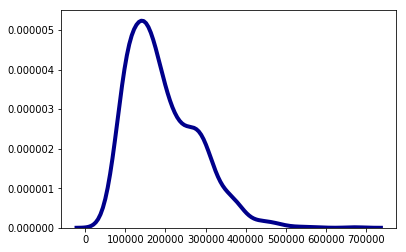

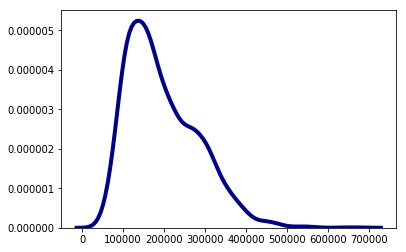

In [11]:
plot_density_plots(results_noisy_descr_patches_diffs_f, results_noisy_descr_patches_x_coords_f, results_noisy_descr_patches_y_coords_f, results_noisy_descr_patches_positions_f)

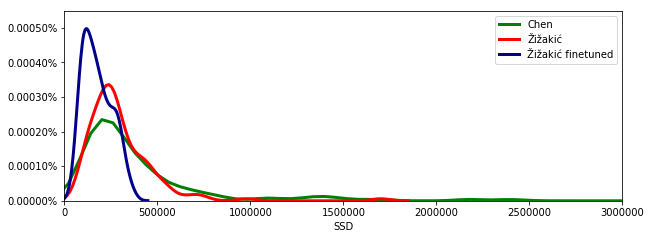

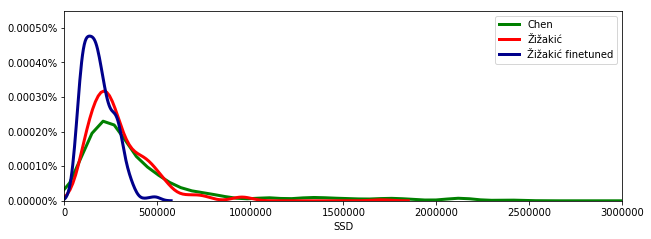

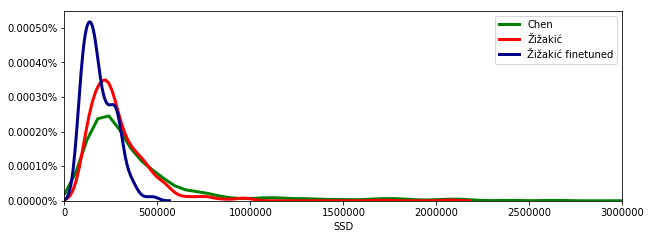

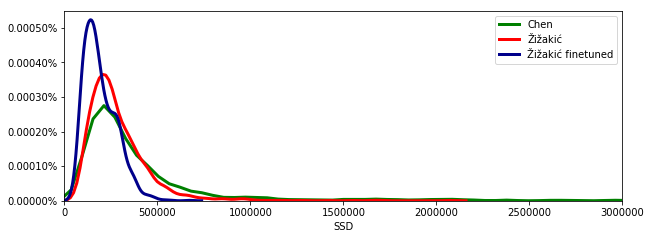

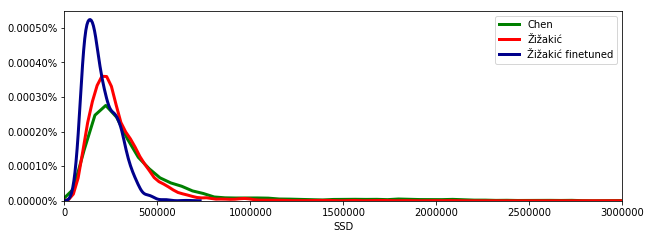

In [12]:
line_width = 3
show_hists = False

for nr_similar_patches in [5,10,20,50,100]:
# for nr_similar_patches in [5]:
    
    plt.figure(figsize=(10, 3.5))


    ssds = []
    for q_it in range(total_nr_query_patches):
        for c_it in range(nr_similar_patches):

            # getting the query patch from the clean image
            x_query = query_x_coords[q_it]
            y_query = query_y_coords[q_it]
            query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

            # getting the compare patch from the clean image
            x_compare = results_noisy_descr_patches_x_coords_c[q_it][c_it]
            y_compare = results_noisy_descr_patches_y_coords_c[q_it][c_it]
            compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

            # calculating the difference in the clean image
            actual_diff = patch_diff(query_patch, compare_patch)
            ssds.append(actual_diff)
    ssds = np.array(ssds)
    sns.distplot(ssds, hist=show_hists, kde=True, 
     bins=int(180/5), color = 'green', 
     hist_kws={'edgecolor':'black'},
     kde_kws={'linewidth': line_width,  "label": "Chen"})    
    
    ssds = []
    for q_it in range(total_nr_query_patches):
        for c_it in range(nr_similar_patches):

            # getting the query patch from the clean image
            x_query = query_x_coords[q_it]
            y_query = query_y_coords[q_it]
            query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

            # getting the compare patch from the clean image
            x_compare = results_noisy_descr_patches_x_coords_z[q_it][c_it]
            y_compare = results_noisy_descr_patches_y_coords_z[q_it][c_it]
            compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

            # calculating the difference in the clean image
            actual_diff = patch_diff(query_patch, compare_patch)
            ssds.append(actual_diff)
    ssds = np.array(ssds)
    sns.distplot(ssds, hist=show_hists, kde=True, 
     bins=int(180/5), color = 'red', 
     hist_kws={'edgecolor':'black'},
     kde_kws={'linewidth': line_width,  "label": "Žižakić"})
    
    ssds = []
    for q_it in range(total_nr_query_patches):
        for c_it in range(nr_similar_patches):

            # getting the query patch from the clean image
            x_query = query_x_coords[q_it]
            y_query = query_y_coords[q_it]
            query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

            # getting the compare patch from the clean image
            x_compare = results_noisy_descr_patches_x_coords_f[q_it][c_it]
            y_compare = results_noisy_descr_patches_y_coords_f[q_it][c_it]
            compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

            # calculating the difference in the clean image
            actual_diff = patch_diff(query_patch, compare_patch)
            ssds.append(actual_diff)
    ssds = np.array(ssds)
    sns.distplot(ssds, hist=show_hists, kde=True, 
     bins=int(180/5), color = 'darkblue', 
     hist_kws={'edgecolor':'black'},
     kde_kws={'linewidth': line_width,  "label": "Žižakić finetuned"})

    

    plt.xlim(0, 3000000)
    plt.ylim(0, 0.0000055)
#     plt.legend(loc='upper right')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xlabel('SSD')
# #     plt.show()
    plt.savefig("/home/niaki/Downloads/histograms_SSD_distplots_" + str(nr_similar_patches) + "_show_hists_" + datetime.datetime.now().strftime("%Y%m%d_%H%M%S") + ".pdf", bbox_inches='tight')

In [13]:
ssds

array([ 97096.,  92169., 112888., ..., 191198., 111097., 123071.],
      dtype=float32)

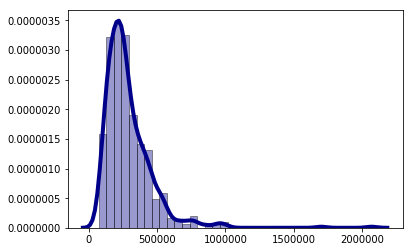

In [14]:
nr_similar_patches = 20

ssds = []
for q_it in range(total_nr_query_patches):
    for c_it in range(nr_similar_patches):

        # getting the query patch from the clean image
        x_query = query_x_coords[q_it]
        y_query = query_y_coords[q_it]
        query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

        # getting the compare patch from the clean image
        x_compare = results_noisy_descr_patches_x_coords_z[q_it][c_it]
        y_compare = results_noisy_descr_patches_y_coords_z[q_it][c_it]
        compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

        # calculating the difference in the clean image
        actual_diff = patch_diff(query_patch, compare_patch)
        ssds.append(actual_diff)
ssds = np.array(ssds)

sns.distplot(ssds, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# plt.hist(ssds, bins=bins, density=1)
# plt.xlim(0, 3000000)
# plt.ylim(0, 0.00001)
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# plt.show()

